In this set of notes, we are going to solve a complex circuit diagram problem. 

The visualization (circuit schematics) are constructed using Python and a package called the **SchemDraw**.  **SchemDraw** is a specialized Python package for drawing circuit diagrams. For **SchemDraw** documentation see: [https://cdelker.bitbucket.io/SchemDraw/SchemDraw.html](https://cdelker.bitbucket.io/SchemDraw/SchemDraw.html)

### **Given:**

The circuit diagram below with a driving voltage $V_t = 5.20 V$ and resistor values in the table below

![7_resistors_3_loops.png](7_resistors_3_loops.png)

| V<sub>t</sub> =| 5.20 V |
| --- | --- |
| R<sub>1</sub> =| 13.2 m&Omega; |
| R<sub>2</sub> =| 21.0 m&Omega; |
| R<sub>3</sub> =| 3.60 m&Omega; |
| R<sub>4</sub> =| 15.2 m&Omega; |
| R<sub>5</sub> =| 11.9 m&Omega; |
| R<sub>6</sub> =| 2.20 m&Omega; |
| R<sub>7</sub> =| 7.40 m&Omega; |

## **Find:** 

V<sub>6</sub> and V<sub>7</sub>, the Voltage drop across resistors R<sub>6</sub> and R<sub>7</sub>

I<sub>3</sub> and I<sub>6</sub>, the current running through resistors R<sub>3</sub> and R<sub>6</sub>

P<sub>4</sub> and P<sub>7</sub>, the power dissapated by resistors R<sub>4</sub> and R<sub>7</sub>

| Parameter | Value |
| --- | --- |
| V<sub>6</sub> | ? |
| V<sub>7</sub> | ? |
| I<sub>3</sub> | ? |
| I<sub>6</sub> | ? |
| P<sub>4</sub> | ? |
| P<sub>7</sub> | ? |

## **Solution:**

In [1]:
import matplotlib.pyplot as plt
# if using a jupyter notebook: include %matplotlib inline. If constructing a .py-file: comment out
%matplotlib inline
# if high-resolution images are desired: include %config InlineBackend.figure_format = 'svg'
%config InlineBackend.figure_format = 'svg'
import SchemDraw as schem
import SchemDraw.elements as e

Now we'll build the circuit diagram by creating a SchemDraw Drawing object and adding elements to it.

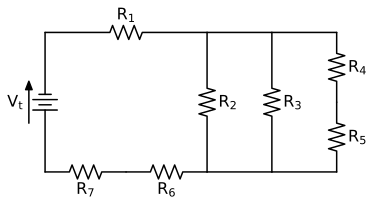

In [2]:
d = schem.Drawing(unit=2.5)
R7 = d.add(e.RES, d='right', botlabel='$R_7$')
R6 = d.add(e.RES, d='right', botlabel='$R_6$')
d.add(e.LINE, d='right', l=2)
d.add(e.LINE, d='right', l=2)
R5 = d.add(e.RES, d='up' , botlabel='$R_5$')
R4 = d.add(e.RES, d='up', botlabel='$R_4$')
d.add(e.LINE, d='left', l=2)
d.push()
R3 = d.add(e.RES, d='down', toy=R6.end, botlabel='$R_3$')
d.pop()
d.add(e.LINE, d='left', l=2)
d.push()
R2 = d.add(e.RES, d='down', toy=R6.end, botlabel='$R_2$')
d.pop()
R1 = d.add(e.RES, d='left', tox=R7.start, label='$R_1$')
Vt = d.add(e.BATTERY, d='up', xy=R7.start, toy=R1.end, label='$V_t$', lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.5)
d.draw()
d.save('7_resistors_3_loops.png')

#d.save('7_resistors_3_loops.pdf')


First we'll find the total resistance of the circuit R<sub>t</sub> by combining the individual resistances.

In [3]:
Vt = 5.2

R1 = 0.0132
R2 = 0.021
R3 = 0.00360
R4 = 0.0152
R5 = 0.0119
R6 = 0.0022
R7 = 0.00740

![7 resistors 3 loops](7_resistors_3_loops.png)

To simplify the circuit diagram, we'll combine the resistors in series.

For resistors in a simple series circuit:

$$ R_t = R_1 + R_2 + R_3 ... + R_n $$

Since reistors $R_4$ and $R_5$ are in simple series:

$$ R_{45} = R_4 + R_5 $$

$$ R_{45} = 0.0152 \ \Omega + 11.9 \ \Omega $$

$$ R_{45} = 0.0271 \ \Omega $$

Since resistors $R_6$ and $R_7$ are in simple series:

$$ R_{67} = R_6 + R_7 $$

$$ R_{67} = 0.00220 \ \Omega + 0.00740 \ \Omega $$

$$ R_{67} = 0.00960 \ \Omega $$

In [4]:
R45 = R4 + R5
R67 = R6 + R7

R45, R67

(0.0271, 0.009600000000000001)

Let's redraw the circuit diagram to show our combined resistors.

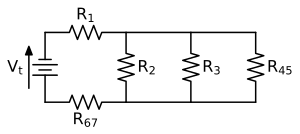

In [5]:
d = schem.Drawing(unit=2.5)
R67 = d.add(e.RES, d='right', botlabel='$R_{67}$')
d.add(e.LINE, d='right', l=2)
d.add(e.LINE, d='right', l=2)
R45 = d.add(e.RES, d='up', botlabel='$R_{45}$')
d.add(e.LINE, d='left', l=2)
d.push()
R3 = d.add(e.RES, d='down', toy=R67.end, botlabel='$R_3$')
d.pop()
d.add(e.LINE, d='left', l=2)
d.push()
R2 = d.add(e.RES, d='down', toy=R67.end, botlabel='$R_2$')
d.pop()
R1 = d.add(e.RES, d='left', tox=R67.start, label='$R_1$')
Vt = d.add(e.BATTERY, d='up', xy=R67.start, toy=R1.end, label='$V_t$', lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.5)
d.draw()
d.save('5_resistors_3_loops.pdf')
d.save('5_resistors_3_loops.png')

Let's redraw the circuit diagram to show our combined resistors.

![5 resistors 3 loops](5_resistors_3_loops.png)

| V<sub>t</sub> =| 5.20 V |
| --- | --- |
| R<sub>1</sub> =| 13.2 m&Omega; |
| R<sub>2</sub> =| 21.0 m&Omega; |
| R<sub>3</sub> =| 3.60 m&Omega; |
| R<sub>45</sub> =| 27.1 m&Omega; |
| R<sub>67</sub> =| 9.60 m&Omega; |

Next we'll combine the resistors in parallel. The resistors in parallel are $R_2$, $R_3$ and $R_{45}$. For a resistors in a simple parallel circuit:

$$ \frac{1}{R_t} = \frac{1}{R_1} + \frac{1}{R_2} + \frac{1}{R_3} ... + \frac{1}{R_n} $$

Since $R_2$, $R_3$ and $R_{45}$ are in parallel:

$$ \frac{1}{R_{2345}} = \frac{1}{R_2} + \frac{1}{R_3} + \frac{1}{R_{45}} $$

$$ R_{2345} = \frac{1}{\frac{1}{R_2} + \frac{1}{R_3} + \frac{1}{R_{45}}} $$

$$ R_{2345} = \frac{1}{\frac{1}{0.0210 \ \Omega} + \frac{1}{0.00360 \ \Omega} + \frac{1}{0.0271 \ \Omega}} $$

$$ R_{2345} = 0.00276016 \ \Omega $$

In [6]:
Vt = 5.2

R1 = 0.0132
R2 = 0.021
R3 = 0.00360
R4 = 0.0152
R5 = 0.0119
R6 = 0.0022
R7 = 0.00740

R45 = R4 + R5
R67 = R6 + R7

R2345 = ((1/R2)+(1/R3)+(1/R45))**(-1)
R2345

0.002760164901786436

OK, now let's simplify the circuit diagram even more. This time combining $R_2$, $R_3$ and $R_{45}$ into one big resistor, $R_{2345}$.

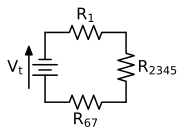

In [7]:
d = schem.Drawing(unit=2.5)
R67 = d.add(e.RES, d='right', botlabel='$R_{67}$')
R345 = d.add(e.RES, d='up' , botlabel='$R_{2345}$')
R1 = d.add(e.RES, d='left', tox=R67.start, label='$R_1$')
Vt = d.add(e.BATTERY, d='up', xy=R67.start, toy=R1.end, label='$V_t$', lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.5)
d.draw()
d.save('3_resistors_1_loop.pdf')
d.save('3_resistors_1_loop.png')

Let's redraw the circuit diagram to show our combined resistors.

![5 resistors 1 loop](3_resistors_1_loop.png)

| V<sub>t</sub> =| 5.20 V |
| --- | --- |
| R<sub>1</sub> =| 13.2 m&Omega; |
| R<sub>2345</sub> =| 2.76016 m&Omega; |
| R<sub>67</sub> =| 9.60 m&Omega; |

Finally, we'll combine the resistors in series. The remaining resistors $R_1$, $R_{2345}$ and $R_{67}$ are in series:

$$ R_{1234567} = R_1 + R_{2345} + R_{67} $$

We'll call the total resistance of the circuit $R_t$ which is equal to  $R_{1234567}$

$$ R_t = R_{1234567} $$

$$ R_{t} = R_1 + R_{2345} + R_{67} $$

$$ R_{t} = 0.0132 \ \Omega + 0.00276016 \ \Omega + 0.00960 \ \Omega $$

$$ R_{t} = 0.0255601 \ \Omega $$


In [8]:
Vt = 5.2

R1 = 0.0132
R2 = 0.021
R3 = 0.00360
R4 = 0.0152
R5 = 0.0119
R6 = 0.0022
R7 = 0.00740

R45 = R4 + R5
R67 = R6 + R7

R2345 = ((1/R2)+(1/R3)+(1/R45))**(-1)

Rt = R1 + R2345 + R67
Rt

0.025560164901786437

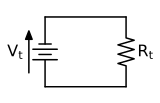

In [9]:
d = schem.Drawing(unit=2.5)
R67 = d.add(e.LINE, d='right')
Rt = d.add(e.RES, d='up' , botlabel='$R_{t}$')
R1 = d.add(e.LINE, d='left', tox=R67.start)
Vt = d.add(e.BATTERY, d='up', xy=R67.start, toy=R1.end, label='$V_t$', lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.5)
d.draw()
d.save('1_resistor_1_loop.pdf')
d.save('1_resistor_1_loop.png')

Let's redraw the circuit diagram to show our combined resistors.

![1 resistor 1 loop](1_resistor_1_loop.png)

| V<sub>t</sub> =| 5.20 V |
| --- | --- |
| R<sub>t</sub> =| 25.56016 m&Omega; |

#### Find V<sub>6</sub> and V<sub>7</sub>

Now that we've solved for the total resistance of the circuit $R_t$, we can find the total current running through the circuit using Ohm's Law $V = IR $.

$$ V = IR $$

$$ I = \frac{V}{R} $$

$$ I_t = \frac{V_t}{R_t} $$

$$ I_t = \frac{5.20 \ V}{0.02545016 \ \Omega} $$

$$ I_t = 203.44 \ A $$

In [10]:
It = Vt/Rt
It

TypeError: unsupported operand type(s) for /: 'Element' and 'Element'

The total current of the circuit, $I_t$ is the same as the current running through resistor $R_6$ and resistor $R_7$.

$$ I_t = I_6 = I_7 $$

$$ I_t = 203.44 \ A $$

$$ I_6 = 203.44 \ A $$

$$ I_7 = 203.44 \ A $$

We can apply Ohm's law to find $V_6$ now that we have $I_6$ and $I_7$. 

$$ V_6 = I_6 R_6 $$

$$ V_6 = (203.44 \ A) (0.00220 \ \Omega) $$

$$ V_6 = 0.447571 \ V $$

$$ V_7 = I_7 R_7 $$

$$ V_7 = (203.44 \ A) (0.00740 \ \Omega) $$

$$ V_7 = 1.50547 \ V $$

![7_resistors_3_loops.png](7_resistors_3_loops.png)

| Parameter | Value | Engineering Notation
| --- | --- |
| V<sub>6</sub> | 0.447571 V | 44.8 mV |
| V<sub>7</sub> | 1.50547 V | 1.51 V |
| I<sub>3</sub> | ? |
| I<sub>6</sub> | ? |
| P<sub>4</sub> | ? |
| P<sub>7</sub> | ? |

In [ ]:
I6 = It
I7 = It
V6 = I6 * R6
V7 = I7 * R7
V6, V7

#### Find I<sub>3</sub> and I<sub>6</sub>

The total current of the circuit, $I_t$ is the same as the current running through resistor $R_{2345}$.

$$ I_t = I_{2345} $$

$$ I_t = 203.44 \ A $$

$$ I_{2345} = 203.44 \ A $$

We can apply Ohm's law to find $V_{2345}$ now that we have $I_{2345}$. 

$$ V_{2345} = I_{2345} R_{2345} $$

$$ V_{2345} = (203.44 \ A) (0.00276016 \ \Omega) $$

$$ V_{2345} = 0.561532 \ V $$

In [ ]:
I2345 = It
V2345 = I2345 * R2345
V2345

The voltage drop across resistor $R_3$ is the same as the voltage drop across resistor $R_{2345}$.

$$ V_3 = V_{2345} $$

Since $V_3$ and $R_3$ are known, we can solve for $I_3$ using Ohm's law:

$$ V = IR $$

$$ I = \frac{V}{R} $$

$$ I_3 = \frac{V_3}{R_3} $$

$$ I_3 = 155.981 \ A $$

Current $I_6$ is the same as current $I_t$:

$$ I_t = I_6 $$

$$ I_t = 203.44 \ A$$

$$ I_6 = 203.44 \ A $$

![7_resistors_3_loops.png](7_resistors_3_loops.png)

| Parameter | Value | Engineering Notation
| --- | --- |
| V<sub>6</sub> | 0.447571 V | 44.8 mV |
| V<sub>7</sub> | 1.50547 V | 1.51 V |
| I<sub>3</sub> | 155.981 A | 156 A |
| I<sub>6</sub> | 203.44 A | 203 A |
| P<sub>4</sub> | ? |
| P<sub>7</sub> | ? |

In [ ]:
V3 = V2345
I3 = V3 / R3

I6 = It

I3, I6

#### Find P<sub>7</sub> and P<sub>4</sub>

Power is equal to Voltage times Current:

$$ P = VI $$

According to Ohm's law, $V = IR$. If we substitue in $V$ as $IR$ into the Power equation we get:

$$ P = (IR)(I) $$

$$ P = I^2 R $$

With a known $R_7$ and $I_7 = I_t = 203.44 \ A$:

$$ P_7 = {I_7}^2 R_7 $$ 

$$ P_7 = ({203.44}^2)(0.00740 \ \Omega) $$

$$ P_7 = 306.27 W $$

In [ ]:
I7 = It
P7 = R7 * I7**2
P7

Current $I_{45}$ is equal to current $I_4$. Voltage $V_{45} = V_{2345}$. Using Ohm's Law again:

$$ I_{45} = \frac{V_{45}}{R_{45}} $$

$$ I_{45} = \frac{0.561532 V}{0.0271 \ \Omega} $$

$$ I_{45} = 20.721 \ A $$

$$ I_{4} = 20.721 \ A $$

In [ ]:
V45 = V2345
I45 = V45/R45
I45

One more time using the power law one more time:
    
$$ P = I^2 R $$

With a known $R_4$ and $I_4 = I_{45}$:

$$ P_4 = {I_4}^2 R_4 $$

$$ P_4 = ({20.721 \ A})^2 (0.0152 \ \Omega) $$

$$ P_4 = 6.52611 \ W $$

In [ ]:
I4 = I45
P4 = R4 * I4**2
P4

![7_resistors_3_loops.png](7_resistors_3_loops.png)

| Parameter | Value | Engineering Notation
| --- | --- |
| V<sub>6</sub> | 0.447571 V | 44.8 mV |
| V<sub>7</sub> | 1.50547 V | 1.51 V |
| I<sub>3</sub> | 155.981 A | 156 A |
| I<sub>6</sub> | 203.44 A | 203 A |
| P<sub>4</sub> | 6.52611 W | 6.53 W |
| P<sub>7</sub> | 306.27 W  | 306 W |

Let's print out all of our final values including units:

In [ ]:
print(f'V6 = {round(V6,3)} V')
print(f'V7 = {round(V7,3)} V')
print(f'I3 = {round(I3,3)} A')
print(f'I6 = {round(I6,3)} A')
print(f'P4 = {round(P4,3)} W')
print(f'P7 = {round(P7,3)} W')